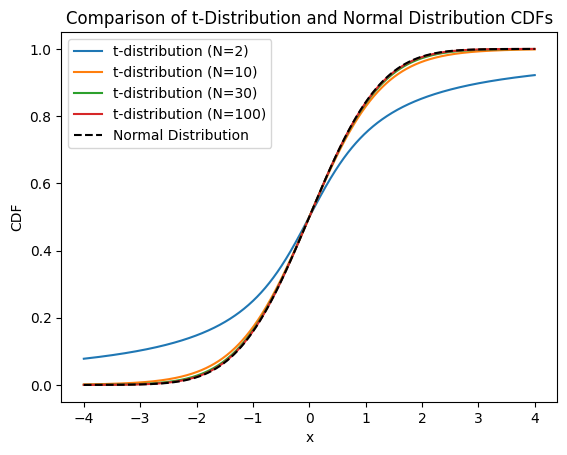

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sample_sizes = [2, 10, 30, 100]

x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()

for N in sample_sizes:
    t_cdf = stats.t.cdf(x, df=N-1)
    ax.plot(x, t_cdf, label=f't-distribution (N={N})')

normal_cdf = stats.norm.cdf(x)

ax.plot(x, normal_cdf, label='Normal Distribution', linestyle='dashed', color='black')


ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Comparison of t-Distribution and Normal Distribution CDFs')
ax.legend()
plt.savefig('t-distribution-cdf.png')

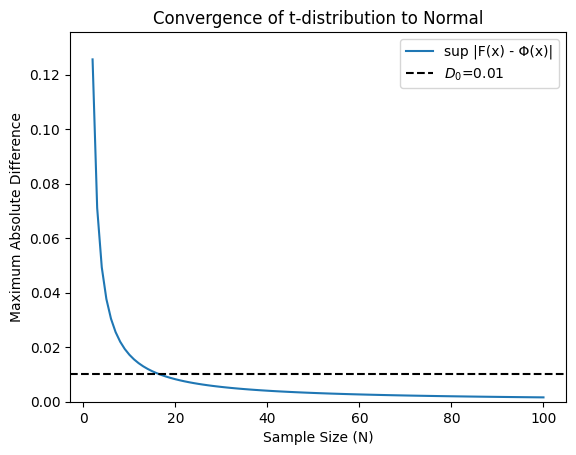

In [3]:
sample_sizes = np.arange(2, 101)
x = np.linspace(-4, 4, 1000)
max_differences = []
for N in sample_sizes:
    t_cdf = stats.t.cdf(x, df=N-1)
    normal_cdf = stats.norm.cdf(x)
    max_diff = np.max(np.abs(t_cdf - normal_cdf))
    max_differences.append(max_diff)


fig, ax = plt.subplots()

ax.plot(sample_sizes, max_differences, linestyle='-', label='sup |F(x) - Φ(x)|')
ax.axhline(0.01, color="black", linestyle='dashed', label='$D_0$=0.01')
ax.set_xlabel('Sample Size (N)')
ax.set_ylabel('Maximum Absolute Difference')
ax.set_title('Convergence of t-distribution to Normal')
ax.set_ylim(0, max(max_differences) + 0.01)
ax.legend()
plt.savefig('t-distribution-convergence.png')


In [4]:
num_simulations = 100_000
simulated_max_differences = []
actual_mean = 0

for N in sample_sizes:
    max_diffs = []
    samples = np.random.normal(size=(N, num_simulations))
    sample_std = samples.std(axis=0, ddof=1)
    sample_mean = samples.mean(axis=0)
    variable = sorted((sample_mean - actual_mean) / (sample_std / np.sqrt(N)))
    
    empirical_cdf = np.linspace(0, 1, num_simulations)
    normal_cdf = stats.norm.cdf(sorted(variable))
    
    # Compute sup |F(x) - Φ(x)|
    max_diff = np.max(np.abs(empirical_cdf - normal_cdf))
    simulated_max_differences.append(max_diff)


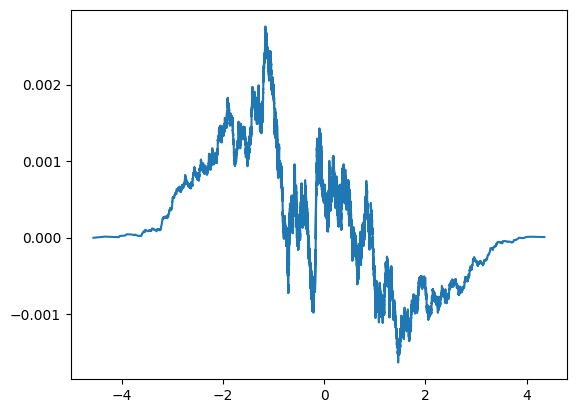

In [5]:
fig, ax = plt.subplots()
ax.plot(sorted(variable), empirical_cdf - normal_cdf,  label='Empirical CDF')

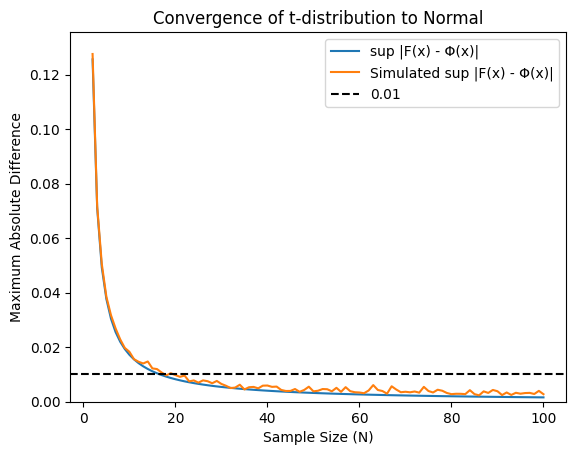

In [6]:
fig, ax = plt.subplots()

ax.plot(sample_sizes, max_differences, linestyle='-', label='sup |F(x) - Φ(x)|')
ax.plot(sample_sizes, simulated_max_differences, linestyle='-', label='Simulated sup |F(x) - Φ(x)|')
ax.axhline(0.01, color="black", linestyle='dashed', label='0.01')
ax.set_xlabel('Sample Size (N)')
ax.set_ylabel('Maximum Absolute Difference')
ax.set_title('Convergence of t-distribution to Normal')
ax.set_ylim(0, max(max_differences) + 0.01)
ax.legend()
plt.savefig('t-distribution-convergence-simulated.png')
plt.show()

In [7]:
num_simulations = 100_000
actual_mean = 0
critical_N = []
probas = np.linspace(0.1, 0.9, 17)
sample_sizes = np.linspace(1_000, 10_000, 19)
for p in probas:
    simulated_max_differences = []
    for N in sample_sizes:
        samples = np.random.binomial(n=N, p=p, size=(num_simulations))
        sample_mean = samples/N
        sample_std = np.sqrt(sample_mean * (1 - sample_mean))
        variable = sorted((sample_mean - p) / (sample_std / np.sqrt(N)))
        
        empirical_cdf = np.linspace(0, 1, num_simulations)
        normal_cdf = stats.norm.cdf(sorted(variable))
        
        # Compute sup |F(x) - Φ(x)|
        max_diff = np.max(np.abs(empirical_cdf - normal_cdf))
        simulated_max_differences.append(max_diff)
    # find the N at which the max difference is less than 0.01
    i_c = np.where(np.array(simulated_max_differences) < 0.01)[0][0]
    critical_N.append(sample_sizes[i_c])

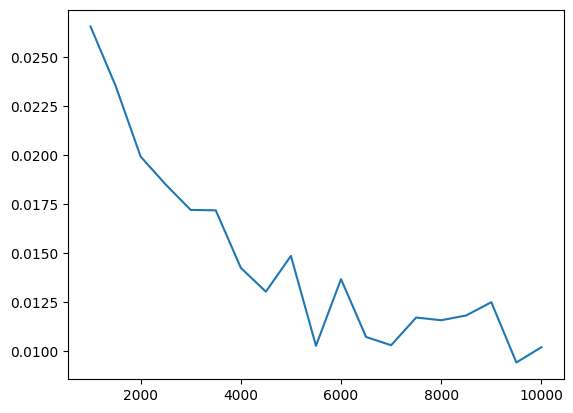

In [8]:
fig, ax = plt.subplots()
ax.plot(sample_sizes, simulated_max_differences, linestyle='-', label='Simulated sup |F(x) - Φ(x)|')

In [9]:
critical_N

[np.float64(9000.0),
 np.float64(6000.0),
 np.float64(4500.0),
 np.float64(3000.0),
 np.float64(3500.0),
 np.float64(3000.0),
 np.float64(2500.0),
 np.float64(2000.0),
 np.float64(2500.0),
 np.float64(3000.0),
 np.float64(2500.0),
 np.float64(3000.0),
 np.float64(3500.0),
 np.float64(3500.0),
 np.float64(5000.0),
 np.float64(6000.0),
 np.float64(9500.0)]

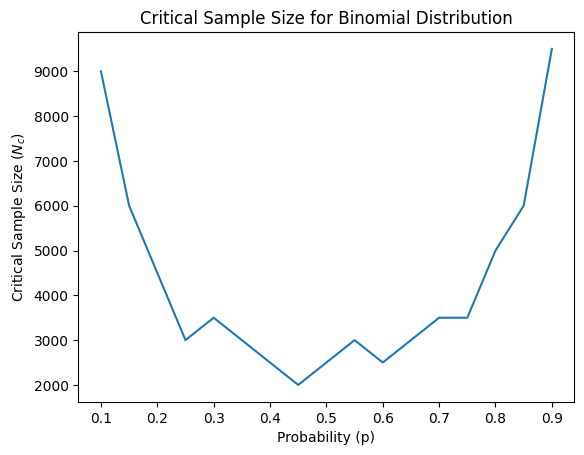

In [10]:
fig, ax = plt.subplots()
ax.plot(probas, critical_N, linestyle='-', label='Critical N')
ax.set_xlabel('Probability (p)')
ax.set_ylabel('Critical Sample Size ($N_c$)')
ax.set_title('Critical Sample Size for Binomial Distribution')
plt.savefig('binomial-distribution-critical-N.png')

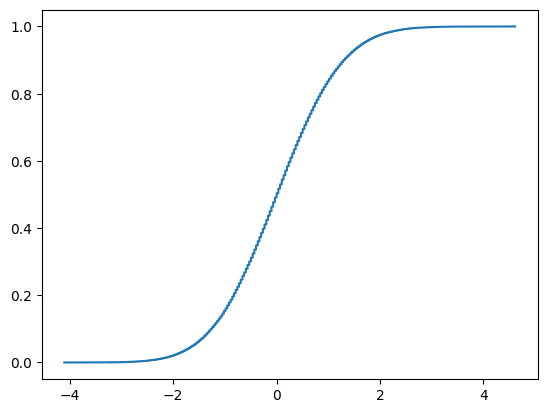

In [11]:
# plot empirical CDF
fig, ax = plt.subplots()
ax.plot(sorted(variable), empirical_cdf,  label='Empirical CDF')
plt.show()

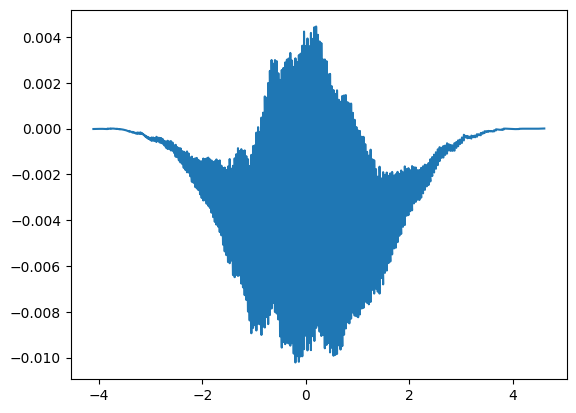

In [12]:
fig, ax = plt.subplots()
ax.plot(sorted(variable), empirical_cdf - normal_cdf,  label='Diff CDF')

(array([7.69230769e-02, 3.84615385e-02, 3.84615385e-02, 1.15384615e-01,
        1.15384615e-01, 1.15384615e-01, 1.15384615e-01, 7.69230769e-02,
        1.92307692e-01, 2.30769231e-01, 4.23076923e-01, 6.92307692e-01,
        3.07692308e-01, 9.23076923e-01, 1.19230769e+00, 2.07692308e+00,
        2.50000000e+00, 1.88461538e+00, 4.30769231e+00, 2.73076923e+00,
        5.88461538e+00, 7.38461538e+00, 6.46153846e+00, 1.06923077e+01,
        8.88461538e+00, 1.58461538e+01, 2.01923077e+01, 1.57692308e+01,
        2.63076923e+01, 2.12307692e+01, 3.48461538e+01, 4.13461538e+01,
        3.36153846e+01, 5.38461538e+01, 4.18076923e+01, 6.64230769e+01,
        7.41538462e+01, 5.59615385e+01, 9.40769231e+01, 6.53846154e+01,
        1.11346154e+02, 1.18461538e+02, 8.20000000e+01, 1.26153846e+02,
        8.97692308e+01, 1.40961538e+02, 1.44576923e+02, 9.93076923e+01,
        1.51846154e+02, 1.05576923e+02, 1.50961538e+02, 1.56000000e+02,
        9.95000000e+01, 1.44269231e+02, 9.62307692e+01, 1.359230

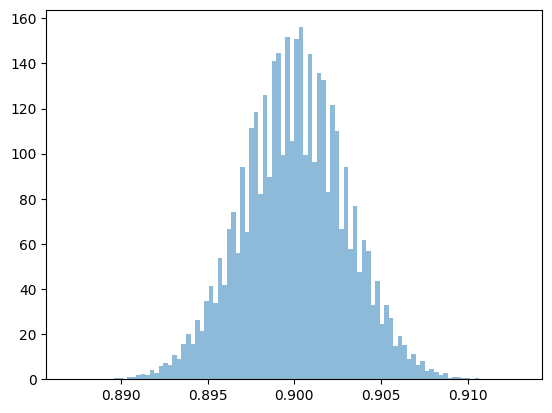

In [13]:
fig, ax = plt.subplots()
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='Empirical PDF')

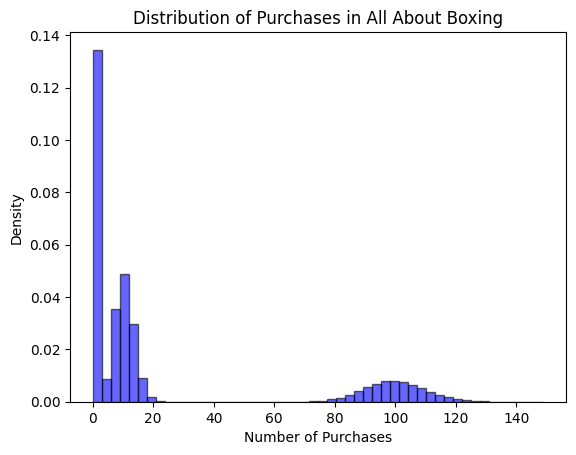

In [19]:
n_samples = 1_000_000
p0, p1, p2 = 0.4, 0.4, 0.2  # Probabilities
choices = np.random.choice([0, 1, 2], size=n_samples, p=[p0, p1, p2])
purchases = np.where(choices == 0, 0, np.where(choices == 1, np.random.poisson(10, n_samples), np.random.poisson(100, n_samples)))

# Plot histogram
fig, ax = plt.subplots()
ax.hist(purchases, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
ax.set_xlabel('Number of Purchases')
ax.set_ylabel('Density')
ax.set_title('Distribution of Purchases in All About Boxing')
fig.savefig('sales-distribution.png')

10.0


/tmp/ipykernel_152272/1421294962.py:10: RuntimeWarning: divide by zero encountered in divide
  variable = (sample_mean - true_mean) / (sample_std / np.sqrt(N))


65.0
120.0
175.0
230.0
285.0
340.0
395.0
450.0
505.0
560.0
615.0
670.0
725.0
780.0
835.0
890.0
945.0
1000.0


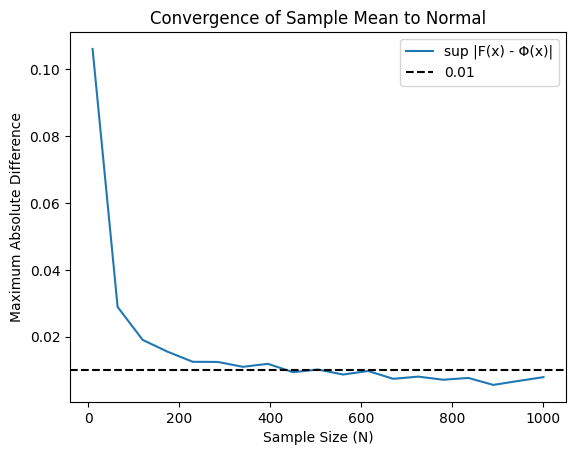

In [24]:
sample_sizes = np.linspace(10, 1_000, 19)
true_mean = np.mean(purchases)
num_simulations = 100_000
max_differences = []
for N in sample_sizes:
    print(N)
    samples = np.random.choice(purchases, size=(int(N), num_simulations), replace=True)
    sample_mean = samples.mean(axis=0)
    sample_std = samples.std(ddof=1, axis=0)
    variable = (sample_mean - true_mean) / (sample_std / np.sqrt(N))
    empirical_cdf = np.linspace(0, 1, num_simulations)
    normal_cdf = stats.norm.cdf(sorted(variable))
    max_diff = np.max(np.abs(empirical_cdf - normal_cdf))
    max_differences.append(max_diff)

fig, ax = plt.subplots()
ax.plot(sample_sizes, max_differences, linestyle='-', label='sup |F(x) - Φ(x)|')
ax.axhline(0.01, color="black", linestyle='dashed', label='0.01')
ax.set_xlabel('Sample Size (N)')
ax.set_ylabel('Maximum Absolute Difference')
ax.set_title('Convergence of Sample Mean to Normal')
ax.legend()
plt.savefig('sales-distribution-convergence.png')